In [1]:
import duckdb
import matplotlib.pyplot as plt

con = duckdb.connect("crunchbase.duckdb", read_only=True)


In [2]:
con.execute("SHOW TABLES").df()


,name
0,acquisitions
1,companies
2,investments
3,rounds


In [3]:
import duckdb
import matplotlib.pyplot as plt

con = duckdb.connect("crunchbase.duckdb", read_only=True)


Funding over Time (final chart):

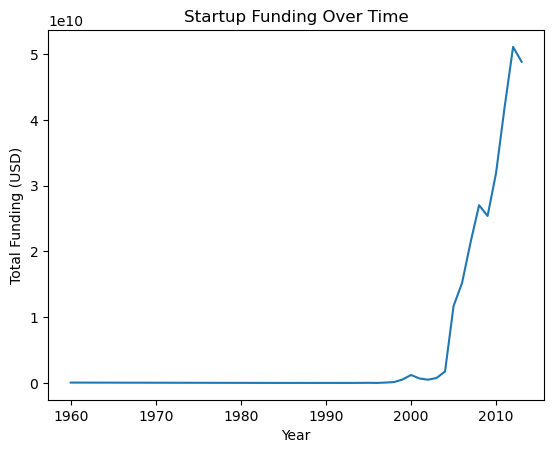

In [4]:
df = con.execute("""
SELECT
    funded_year,
    SUM(raised_amount_usd) AS total_funding_usd
FROM rounds
WHERE funded_year IS NOT NULL
  AND raised_amount_usd IS NOT NULL
GROUP BY funded_year
ORDER BY funded_year
""").df()

plt.figure()
plt.plot(df["funded_year"], df["total_funding_usd"])
plt.title("Startup Funding Over Time")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.show()


Funding by Fund Type (final chart):

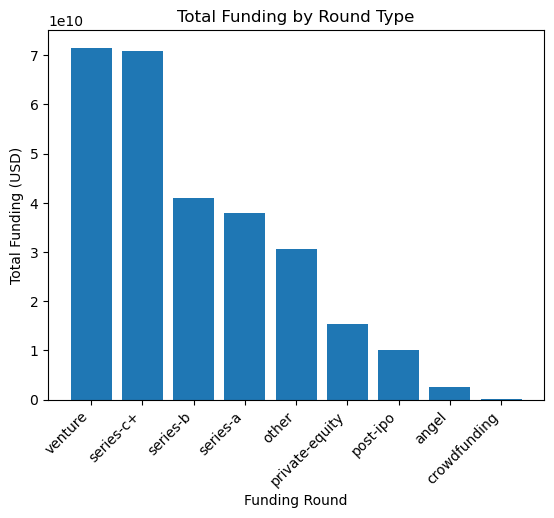

In [5]:
df = con.execute("""
SELECT
    funding_round_type,
    SUM(raised_amount_usd) AS total_funding_usd
FROM rounds
WHERE funding_round_type IS NOT NULL
  AND raised_amount_usd IS NOT NULL
GROUP BY funding_round_type
ORDER BY total_funding_usd DESC
""").df()

plt.figure()
plt.bar(df["funding_round_type"], df["total_funding_usd"])
plt.xticks(rotation=45, ha="right")
plt.title("Total Funding by Round Type")
plt.xlabel("Funding Round")
plt.ylabel("Total Funding (USD)")
plt.show()


Most Active Investors (final chart):

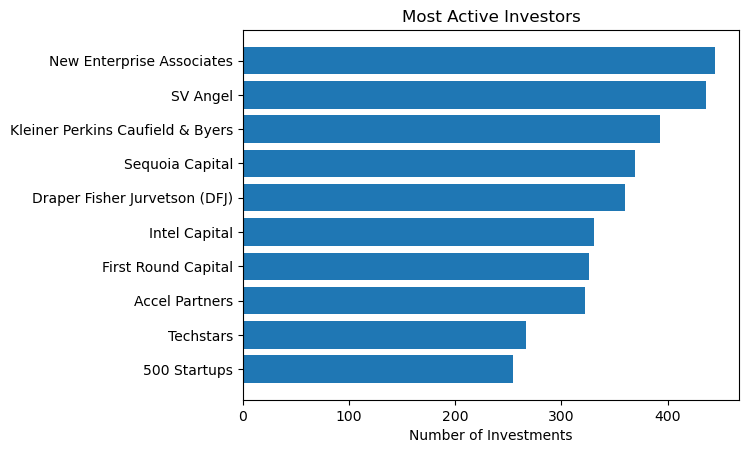

In [6]:
df = con.execute("""
SELECT
    investor_name,
    COUNT(*) AS investments_made
FROM investments
WHERE investor_name IS NOT NULL
GROUP BY investor_name
ORDER BY investments_made DESC
LIMIT 10
""").df()

plt.figure()
plt.barh(df["investor_name"], df["investments_made"])
plt.gca().invert_yaxis()
plt.title("Most Active Investors")
plt.xlabel("Number of Investments")
plt.show()


Acquirers vs Non-Acquirers:

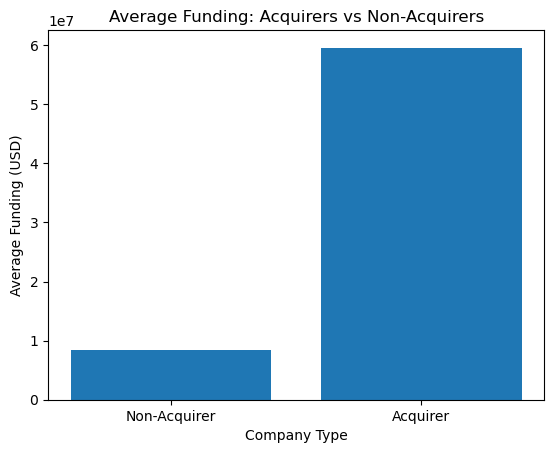

In [7]:
df = con.execute("""
SELECT
    CASE
        WHEN a.acquirer_permalink IS NOT NULL THEN 'Acquirer'
        ELSE 'Non-Acquirer'
    END AS company_type,
    AVG(r.raised_amount_usd) AS avg_funding_usd
FROM companies c
LEFT JOIN acquisitions a
    ON c.permalink = a.acquirer_permalink
LEFT JOIN rounds r
    ON c.permalink = r.company_permalink
WHERE r.raised_amount_usd IS NOT NULL
GROUP BY company_type
""").df()

plt.figure()
plt.bar(df["company_type"], df["avg_funding_usd"])
plt.title("Average Funding: Acquirers vs Non-Acquirers")
plt.xlabel("Company Type")
plt.ylabel("Average Funding (USD)")
plt.show()


**Final Insights:** Companies that acquire other firms tend to have higher average funding,
suggesting capital availability enables inorganic growth.